<a href="https://colab.research.google.com/github/devastio/Tugas_Damin-24maret/blob/master/TUBES_DAMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
dataset = pd.read_csv(r'/content/drive/My Drive/merchandise_values_annual_dataset.csv', encoding='latin-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,6,7,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## **Dataset yang digunakan**

In [0]:
dataset

,IndicatorCategory,IndicatorCode,Indicator,ReporterCode,ReporterISO3A,Reporter,PartnerCode,PartnerISO3A,Partner,ProductClassificationCode,ProductClassification,ProductCode,Product,PeriodCode,Period,FrequencyCode,Frequency,UnitCode,Unit,Year,ValueFlagCode,ValueFlag,Value
0,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,414,KWT,"Kuwait, the State of",0,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,1985,NaN,NaN,722
1,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,414,KWT,"Kuwait, the State of",0,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,1986,NaN,NaN,844
2,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,414,KWT,"Kuwait, the State of",0,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,1987,NaN,NaN,1124
3,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,308,GRD,Grenada,0,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,2010,E,Estimate,73
4,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,414,KWT,"Kuwait, the State of",0,NaN,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,1984,NaN,NaN,1035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543650,Merchandise trade values,ITS_MTV_AX,Merchandise exports by product group and desti...,948,NaN,Four East Asian traders,932,NaN,South and Central America and the Caribbean,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,USM,Million US dollar,2012,NaN,NaN,44007
543651,Merchandise trade values,ITS_MTV_AX,Merchandise exports by product group and desti...,957,NaN,West African Economic and Monetary Union (WAEMU),840,USA,United States of America,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,USM,Million US dollar,2013,NaN,NaN,912
543652,Merchandise trade values,ITS_MTV_AX,Merchandise exports by product group and desti...,975,NaN,Association of Southeast Asian Nations (ASEAN),484,MEX,Mexico,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,USM,Million US dollar,2013,NaN,NaN,5982
543653,Merchandise trade values,ITS_MTV_AX,Merchandise exports by product group and desti...,975,NaN,Association of Southeast Asian Nations (ASEAN),484,MEX,Mexico,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,USM,Million US dollar,2014,NaN,NaN,6873


## **Proses Persiapan Data**

### **Hapus atribut yang punya nilai kosong**

In [0]:
dataset.isnull().sum()

IndicatorCategory                 0
IndicatorCode                     0
Indicator                         0
ReporterCode                      0
ReporterISO3A                358184
Reporter                          0
PartnerCode                       0
PartnerISO3A                 433565
Partner                           0
ProductClassificationCode         0
ProductClassification             0
ProductCode                       0
Product                           0
PeriodCode                        0
Period                            0
FrequencyCode                     0
Frequency                         0
UnitCode                          0
Unit                              0
Year                              0
ValueFlagCode                533107
ValueFlag                    533107
Value                             0
dtype: int64

In [0]:
dataset.drop(["ReporterISO3A", "PartnerISO3A", "ValueFlagCode", "ValueFlag",], axis = 1, inplace = True) 

In [0]:
dataset.isnull().sum()

IndicatorCategory            0
IndicatorCode                0
Indicator                    0
ReporterCode                 0
Reporter                     0
PartnerCode                  0
Partner                      0
ProductClassificationCode    0
ProductClassification        0
ProductCode                  0
Product                      0
PeriodCode                   0
Period                       0
FrequencyCode                0
Frequency                    0
UnitCode                     0
Unit                         0
Year                         0
Value                        0
dtype: int64

### **penghapusan atribut nilai/makna sama, tidak dibutuhkan, isi yang sama semua**

In [0]:
dataset

,IndicatorCategory,IndicatorCode,Indicator,ReporterCode,Reporter,PartnerCode,Partner,ProductClassificationCode,ProductClassification,ProductCode,Product,PeriodCode,Period,FrequencyCode,Frequency,UnitCode,Unit,Year,Value
0,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,414,"Kuwait, the State of",0,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,1985,722
1,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,414,"Kuwait, the State of",0,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,1986,844
2,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,414,"Kuwait, the State of",0,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,1987,1124
3,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,308,Grenada,0,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,2010,73
4,Merchandise trade values,ITS_MTV_AM,Merchandise imports by product group - annual,414,"Kuwait, the State of",0,World,SITC3,Merchandise - SITC Revision 3 (aggregates),AG,Agricultural products,A,Annual,A,Annual,USM,Million US dollar,1984,1035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543650,Merchandise trade values,ITS_MTV_AX,Merchandise exports by product group and desti...,948,Four East Asian traders,932,South and Central America and the Caribbean,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,USM,Million US dollar,2012,44007
543651,Merchandise trade values,ITS_MTV_AX,Merchandise exports by product group and desti...,957,West African Economic and Monetary Union (WAEMU),840,United States of America,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,USM,Million US dollar,2013,912
543652,Merchandise trade values,ITS_MTV_AX,Merchandise exports by product group and desti...,975,Association of Southeast Asian Nations (ASEAN),484,Mexico,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,USM,Million US dollar,2013,5982
543653,Merchandise trade values,ITS_MTV_AX,Merchandise exports by product group and desti...,975,Association of Southeast Asian Nations (ASEAN),484,Mexico,SITC3,Merchandise - SITC Revision 3 (aggregates),TO,Total merchandise,A,Annual,A,Annual,USM,Million US dollar,2014,6873


In [0]:
for col in dataset.columns:
    print(col,': ')
    print(dataset[col].unique(),'\n')

IndicatorCategory : 
['Merchandise trade values'] 

IndicatorCode : 
['ITS_MTV_AM' 'ITS_MTV_AX'] 

Indicator : 
['Merchandise imports by product group - annual'
 'Merchandise exports by product group and destination - annual'] 

ReporterCode : 
[414 308 392 428 410 232 56 320 348 434 12 404 324 328 398 304 440 356 218
 372 50 756 422 40 400 532 204 642 894 893 892 638 120 784 886 0 643 862
 760 891 736 608 800 858 748 740 214 533 780 604 659 716 705 882 840 662
 764 826 887 818 834 242 752 104 384 860 312 798 788 792 591 807 376 678
 686 530 724 704 854 890 702 694 446 666 768 450 417 776 682 585 804 710
 620 364 646 626 504 624 616 586 352 703 720 360 762 634 266 466 566 690
 670 430 498 706 48 270 191 570 508 600 578 278 795 512 230 156 426 540
 554 548 516 276 300 598 562 268 528 583 340 68 76 368 558 524 458 470 454
 222 462 144 442 418 474 500 484 478 212 72 208 496 152 192 44 112 332 258
 480 64 60 52 58 231 178 136 96 51 246 388 32 203 36 233 31 8 84 184 4 70
 158 116 90 254 100

In [0]:
dataset.drop(["IndicatorCategory","Reporter", "ReporterCode", "PartnerCode", "Partner", "ProductClassificationCode", "ProductClassification", "Product", "PeriodCode", "Period", "Frequency", "FrequencyCode", "UnitCode", "Unit", "Year"], axis = 1, inplace = True) 

In [0]:
dataset

,IndicatorCode,Indicator,ProductCode,Value
0,ITS_MTV_AM,Merchandise imports by product group - annual,AG,722
1,ITS_MTV_AM,Merchandise imports by product group - annual,AG,844
2,ITS_MTV_AM,Merchandise imports by product group - annual,AG,1124
3,ITS_MTV_AM,Merchandise imports by product group - annual,AG,73
4,ITS_MTV_AM,Merchandise imports by product group - annual,AG,1035
...,...,...,...,...
543650,ITS_MTV_AX,Merchandise exports by product group and desti...,TO,44007
543651,ITS_MTV_AX,Merchandise exports by product group and desti...,TO,912
543652,ITS_MTV_AX,Merchandise exports by product group and desti...,TO,5982
543653,ITS_MTV_AX,Merchandise exports by product group and desti...,TO,6873


### **konversi string ke integer**

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [0]:
dataset['IndicatorCode'] = le.fit_transform(dataset.IndicatorCode)
dataset

,IndicatorCode,Indicator,ProductCode,Value
0,0,Merchandise imports by product group - annual,AG,722
1,0,Merchandise imports by product group - annual,AG,844
2,0,Merchandise imports by product group - annual,AG,1124
3,0,Merchandise imports by product group - annual,AG,73
4,0,Merchandise imports by product group - annual,AG,1035
...,...,...,...,...
543650,1,Merchandise exports by product group and desti...,TO,44007
543651,1,Merchandise exports by product group and desti...,TO,912
543652,1,Merchandise exports by product group and desti...,TO,5982
543653,1,Merchandise exports by product group and desti...,TO,6873


In [0]:
dataset['Indicator'] = le.fit_transform(dataset.Indicator)
dataset

,IndicatorCode,Indicator,ProductCode,Value
0,0,1,AG,722
1,0,1,AG,844
2,0,1,AG,1124
3,0,1,AG,73
4,0,1,AG,1035
...,...,...,...,...
543650,1,0,TO,44007
543651,1,0,TO,912
543652,1,0,TO,5982
543653,1,0,TO,6873


In [0]:
dataset['ProductCode'] = le.fit_transform(dataset.ProductCode)
dataset

,IndicatorCode,Indicator,ProductCode,Value
0,0,1,0,722
1,0,1,0,844
2,0,1,0,1124
3,0,1,0,73
4,0,1,0,1035
...,...,...,...,...
543650,1,0,30,44007
543651,1,0,30,912
543652,1,0,30,5982
543653,1,0,30,6873


In [0]:
# dataset['ProductCode'] = le.fit_transform(dataset.ProductCode)
# dataset

### **penyetaraan range**

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,10))
data_scaled = pd.DataFrame(scaler.fit_transform(dataset),columns=dataset.columns)
dataset = data_scaled.round(2)

In [0]:
dataset

,IndicatorCode,Indicator,ProductCode,Value
0,0.0,10.0,0.0,0.00
1,0.0,10.0,0.0,0.00
2,0.0,10.0,0.0,0.00
3,0.0,10.0,0.0,0.00
4,0.0,10.0,0.0,0.00
...,...,...,...,...
543650,10.0,0.0,10.0,0.02
543651,10.0,0.0,10.0,0.00
543652,10.0,0.0,10.0,0.00
543653,10.0,0.0,10.0,0.00


### **hilangkan duplikasi**



In [0]:
# dataset = dataset.drop_duplicates()

In [0]:
# dataset

## **Pencarian jumlah kelas optimal dengan metode elbow**

In [0]:
from sklearn.cluster import KMeans

distortions = []

K = range(1,10)
for k in K:

    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)

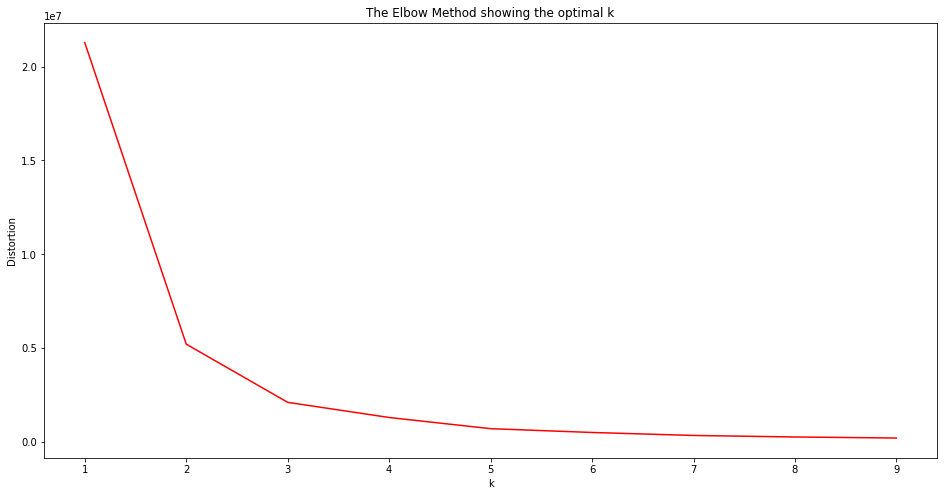

In [0]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16,8))
plt.plot(K, distortions,c='r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(dataset)
centroid = kmeanModel.cluster_centers_

## **Pemanggilan dataset yang telah digabung dengan kelas**

In [0]:
dataset = pd.read_csv(r'/content/drive/My Drive/datafix4.csv')

In [0]:
# data_encoded = []

# for i in range(0,len(dataset.columns)):
    
#     data_encoded.append(dataset[dataset.columns[i]])    

# dataset = list(zip(*data_encoded))

In [0]:
# cluster = []
# for i in range (0,len(dataset)):
  
#   dist = []
#   for j in range (0,len(centroid)):
#     delta = []
#     for k in range (0,len(dataset[i])):
#       delta.append((dataset[i][k]-centroid[j][k])**2)
    
#     nilai_sum = sum(delta)
#     dist.append(nilai_sum**(1/2))
#   # if dist[0] < dist[1]:
#   #   cluster.append(0)
#   # elif dist[1] < dist[0]:
#   #   cluster.append(1)

#   if dist[0] < dist[1] and dist[0] < dist[2]:
#     cluster.append(0)
#   elif dist[1] < dist[0] and dist[1] < dist[2]:
#     cluster.append(1)
#   elif dist[2] < dist[0] and dist[2] < dist[1]:
#     cluster.append(2)

In [0]:
# dataset = pd.DataFrame(data = dataset)
# cluster = pd.DataFrame(data = cluster)

# dataset = pd.concat([dataset, cluster], axis=1, ignore_index=True)

## **Dataset sebelum hilangkan duplikasi**

In [0]:
dataset

,IndicatorCode,Indicator,Product,Value,Cluster
0,10.0,0.0,3.12,0.00,0
1,10.0,0.0,5.14,0.00,0
2,10.0,0.0,6.70,0.00,0
3,10.0,0.0,7.83,0.00,0
4,10.0,0.0,0.58,1.02,0
...,...,...,...,...,...
543650,10.0,0.0,2.14,0.00,0
543651,10.0,0.0,6.63,0.00,0
543652,10.0,0.0,6.45,0.00,0
543653,10.0,0.0,1.34,0.00,0


## **Dataset sesudah hilangkan duplikasi**

In [0]:
dataset = dataset.drop_duplicates()

In [0]:
dataset

,IndicatorCode,Indicator,Product,Value,Cluster
0,10.0,0.0,3.12,0.00,0
1,10.0,0.0,5.14,0.00,0
2,10.0,0.0,6.70,0.00,0
3,10.0,0.0,7.83,0.00,0
4,10.0,0.0,0.58,1.02,0
...,...,...,...,...,...
541405,0.0,10.0,3.48,6.11,2
541989,10.0,0.0,3.19,1.20,0
542223,0.0,10.0,6.92,0.37,2
542592,10.0,0.0,0.04,0.23,0


## **Proses klasifikasi**

In [0]:
data_encoded = []

for i in range(0,len(dataset.columns)-1):
    
    data_encoded.append(dataset[dataset.columns[i]])    

data = list(zip(*data_encoded))

In [0]:
cluster = dataset['Cluster']

### **Library yang digunakan pada proses klasifikasi**

In [0]:
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import statistics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

### **Naive Bayes**

In [0]:
clf = GaussianNB()
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='accuracy')
a = statistics.mean(scores)
a

0.9956434316353887

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='recall_macro')
a = statistics.mean(scores)
a

0.9071715252005107

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='precision_macro')
a = statistics.mean(scores)
a

0.9970699659296378

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='precision_macro')
a = statistics.mean(scores)
a

0.9970699659296378

### **SVM**

In [0]:
clf = svm.SVC(kernel='linear')
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='accuracy')
a = statistics.mean(scores)
a

0.9980563002680966

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='recall_macro')
a = statistics.mean(scores)
a

0.9716991459396573

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='precision_macro')
a = statistics.mean(scores)
a

0.9846432396792969

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='precision_macro')
a = statistics.mean(scores)
a

0.9846432396792969

### **Decision Tree**

In [0]:
clf = DecisionTreeClassifier()
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='accuracy')
a = statistics.mean(scores)
a

0.999195710455764

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='recall_macro')
a = statistics.mean(scores)
a

0.9896025881229333

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='precision_macro')
a = statistics.mean(scores)
a

0.9964443378453046

In [0]:
scores = cross_val_score(clf, data, cluster, cv=cv, scoring='precision_macro')
a = statistics.mean(scores)
a

0.997929186330153